# StockX Consumer Region Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

%matplotlib inline
# all figures will have figsize(10,5)
plt.rcParams["figure.figsize"] = [10, 5]

In [12]:
# load the data
fp = "~/Desktop/DATA/data1030_student_f20/final-project/data/StockX-Data.csv"
df = pd.read_csv(fp)
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


## Initial Data Cleaning

In [13]:
df.shape

(99956, 8)

In [14]:
df.dtypes

# mostly categorical except Sale Price, Retail Price, Shoe Size
# Sale Price and Retail Price are of type 'object', probably because of the '$'

Order Date       object
Brand            object
Sneaker Name     object
Sale Price       object
Retail Price     object
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object

Our features are mostly categorical except `Sale Price`, `Retail Price`, and `Shoe Size`. `Sale Price` and `Retail Price` are of type 'object', probably because of the dollar sign in their values. 

In [15]:
# check for null/missing data
df.isnull().sum()

Order Date      0
Brand           0
Sneaker Name    0
Sale Price      0
Retail Price    0
Release Date    0
Shoe Size       0
Buyer Region    0
dtype: int64

Next, we clean our data by removing all dollar signs and commas from the price data. It also prepares it for casting to numeric types. 

In [16]:
# remove $ and comma from price data
# prepare for casting
df['Sale Price'] = df['Sale Price'].str.replace(',', '')
df['Sale Price'] = df['Sale Price'].str.replace('$', '')
df['Retail Price'] = df['Retail Price'].str.replace(',', '')
df['Retail Price'] = df['Retail Price'].str.replace('$', '')

In [17]:
# typecast Sale Price and Retail Price to float64
# cast Order Date and Release Date to datetimes
df['Sale Price'] = pd.to_numeric(df['Sale Price'], errors = 'coerce')
df['Retail Price'] = pd.to_numeric(df['Retail Price'], errors = 'coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Release Date'] = pd.to_datetime(df['Release Date'])
print(df.dtypes)

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price               int64
Retail Price             int64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
dtype: object


In [18]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island


In [9]:
# cast sale price and retail price as float64
df.astype({'Sale Price':'float64', 'Retail Price':'float64'})

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2017-02-11,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220.0,2018-12-26,8.0,Oregon
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220.0,2018-12-26,8.5,California
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220.0,2018-12-26,5.5,New York
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220.0,2018-12-26,11.0,California


In [25]:
# rename columns to remove spaces 
df = df.rename(columns = {
    "Order Date": "Order_Date", 
    "Sneaker Name": "Sneaker_Name", 
    "Sale Price": "Sale_Price", 
    "Retail Price": "Retail_Price", 
    "Release Date": "Release_Date", 
    "Shoe Size": "Shoe_Size", 
    "Buyer Region": "Buyer_Region"
})
df.head()

,Order_Date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island


## EDA

In [26]:
df.describe()

,Sale_Price,Retail_Price,Shoe_Size
count,99956.000000,99956.00000,99956.000000
mean,446.634719,208.61359,9.344181
std,255.982969,25.20001,2.329588
min,186.000000,130.00000,3.500000
25%,275.000000,220.00000,8.000000
50%,370.000000,220.00000,9.500000
75%,540.000000,220.00000,11.000000
max,4050.000000,250.00000,17.000000


In [27]:
# describe categorical variables
for (col_name, col_val) in df.iteritems(): 
    if col_name != 'Sale_Price' and col_name != 'Retail_Price' and col_name != 'Shoe_Size' \
    and col_name != 'Buyer_Region':
        print(col_name, '\n', df[col_name].value_counts())
        print('\n')

Order_Date 
 2018-11-16    1388
2018-11-23    1262
2018-12-27    1034
2018-06-30    1033
2019-02-07     893
              ... 
2017-10-16      10
2017-10-22       9
2017-10-15       8
2017-10-19       8
2017-10-29       8
Name: Order_Date, Length: 531, dtype: int64


Brand 
  Yeezy       72162
Off-White    27794
Name: Brand, dtype: int64


Sneaker_Name 
 adidas-Yeezy-Boost-350-V2-Butter                     11423
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                10395
Adidas-Yeezy-Boost-350-V2-Zebra                      10110
Adidas-Yeezy-Boost-350-V2-Blue-Tint                   9297
Adidas-Yeezy-Boost-350-V2-Cream-White                 9097
Adidas-Yeezy-Boost-350-V2-Sesame                      5553
adidas-Yeezy-Boost-350-V2-Static                      4983
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          4854
Air-Jordan-1-Retro-High-Off-White-University-Blue     4635
adidas-Yeezy-Boost-350-V2-Static-Reflective           3184
Nike-Air-Presto-Off-White-Black-2018                 

In [28]:
# explore properties of target variable
# number of unique buyer regions 
# number of sales per region

print("Number of unique buyer regions: ", df['Buyer_Region'].nunique())
df['Buyer_Region'].value_counts()

# 51 unique buyer regions is a lot
# having this many classifiers may complicate the ML pipeline down the line (?)

Number of unique buyer regions:  51


California              19349
New York                16525
Oregon                   7681
Florida                  6376
Texas                    5876
New Jersey               4720
Illinois                 3782
Pennsylvania             3109
Massachusetts            2903
Michigan                 2762
Virginia                 2058
Ohio                     1890
Maryland                 1870
Washington               1863
Georgia                  1846
Arizona                  1398
North Carolina           1344
Delaware                 1242
Connecticut              1110
Indiana                  1026
Colorado                  954
Wisconsin                 840
Nevada                    790
Tennessee                 731
Minnesota                 725
Missouri                  660
South Carolina            570
Louisiana                 537
Kentucky                  488
Iowa                      460
Alabama                   457
Utah                      450
Oklahoma                  412
Hawaii    

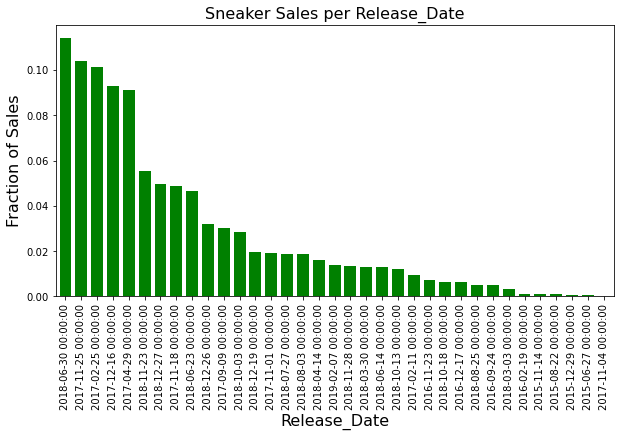

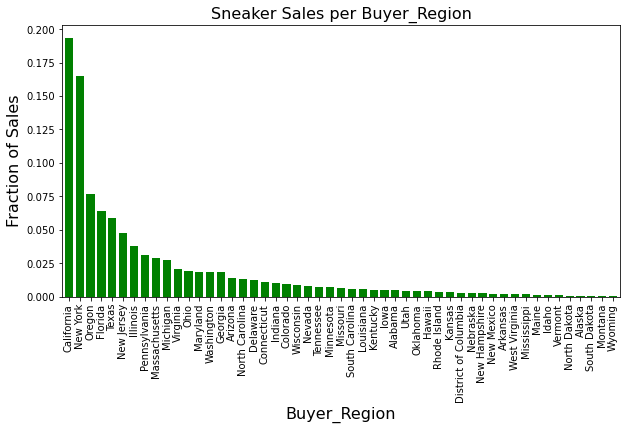

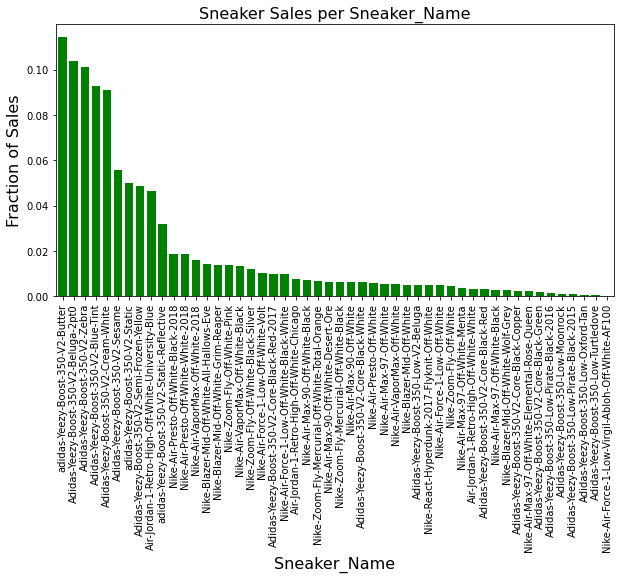

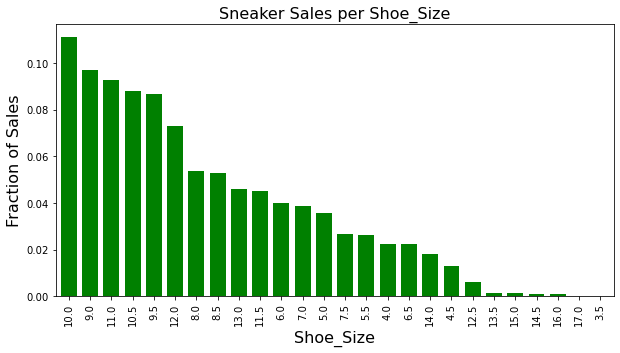

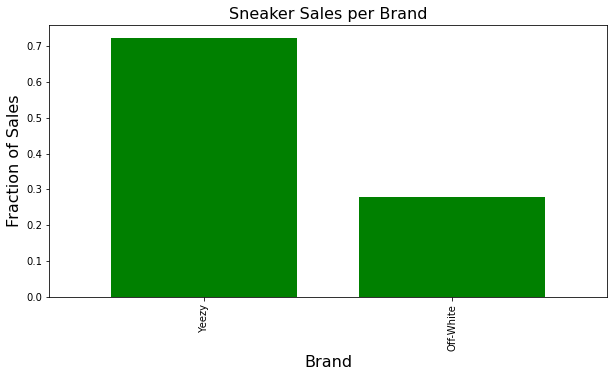

In [40]:
# distributions for release date, buyer region, sneaker name, shoe size, and brand
# create normalized pie plots for buyer region and shoe size 

# pay special attention to buyer region

cats = ['Release_Date', 'Buyer_Region', 'Sneaker_Name', 'Shoe_Size', 'Brand']
for cat in cats: 
    plot = pd.value_counts(df[str(cat)], normalize = True).plot.bar(color = 'green', width = 0.75)
    plt.title("Sneaker Sales per %s" % (cat), fontsize = 16)
    plt.xlabel("%s" % (cat), fontsize = 16, ha = 'center')
    plt.ylabel("Fraction of Sales", fontsize = 16, ha = 'center')
    plt.savefig('figures/SneakerSalesPer{}.png'.format(cat), bbox_inches = 'tight')
    plt.show()

Our original target variable, **Buyer Region**, has 51 unique classifiers. Using this many classifiers in our final model is likely to cause complications later in the supervised ML pipeline, so I will then consolidate these regions into 4 **US Regions**. These four regions are based on US Census Bureau-designated regions and divisions.

In [29]:
# creating a new column called 'US_Region' 
# reduces number of unique classifiers in target variable
# regions are based on Census Bureau-designated regions and divisions
us_regions = []
for index, row in df.iterrows():
    if row['Buyer_Region'] == "Connecticut" or \
    row['Buyer_Region'] == 'Maine' or \
    row['Buyer_Region'] == 'Massachusetts' or \
    row['Buyer_Region'] == 'New Hampshire' or \
    row['Buyer_Region'] == 'Rhode Island' or \
    row['Buyer_Region'] == 'Vermont' or \
    row['Buyer_Region'] == 'New Jersey' or \
    row['Buyer_Region'] == 'New York' or \
    row['Buyer_Region'] == 'Pennsylvania':
        us_regions.append('Northeast')
    elif row['Buyer_Region'] == 'Illinois' or \
    row['Buyer_Region'] == 'Indiana' or \
    row['Buyer_Region'] == 'Michigan' or \
    row['Buyer_Region'] == 'Ohio' or \
    row['Buyer_Region'] == 'Wisconsin' or \
    row['Buyer_Region'] == 'Iowa' or \
    row['Buyer_Region'] == 'Kansas' or \
    row['Buyer_Region'] == 'Minnesota' or \
    row['Buyer_Region'] == 'Missouri' or \
    row['Buyer_Region'] == 'Nebraska' or \
    row['Buyer_Region'] == 'North Dakota' or \
    row['Buyer_Region'] == 'South Dakota':
        us_regions.append('Midwest')
    elif row['Buyer_Region'] == 'Arizona' or \
    row['Buyer_Region'] == 'Colorado' or \
    row['Buyer_Region'] == 'Idaho' or \
    row['Buyer_Region'] == 'Montana' or \
    row['Buyer_Region'] == 'Nevada' or \
    row['Buyer_Region'] == 'New Mexico' or \
    row['Buyer_Region'] == 'Utah' or \
    row['Buyer_Region'] == 'Wyoming' or \
    row['Buyer_Region'] == 'Alaska' or \
    row['Buyer_Region'] == 'California' or \
    row['Buyer_Region'] == 'Hawaii' or \
    row['Buyer_Region'] == 'Oregon' or \
    row['Buyer_Region'] == 'Washington': 
        us_regions.append('West')
    else: 
        us_regions.append('South')

df['US_Region'] = us_regions

In [30]:
df.head()

,Order_Date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size,Buyer_Region,US_Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,West
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,West
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,West
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,South
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,Northeast


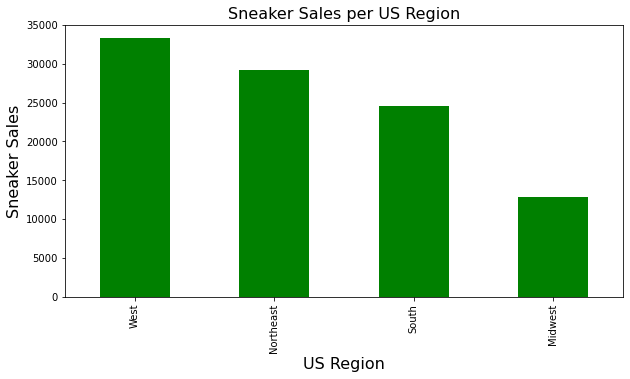

In [39]:
pd.value_counts(df['US_Region']).plot.bar(color = 'green')
plt.title('Sneaker Sales per US Region', fontsize = 16)
plt.xlabel('US Region', fontsize = 16)
plt.ylabel('Sneaker Sales', fontsize = 16)
plt.savefig('figures/SneakerSalesPerUSRegion.png', dpi = 300, bbox_inches = 'tight')
plt.show()

/Users/kevin18le/opt/anaconda3/envs/data1030-kevinle/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


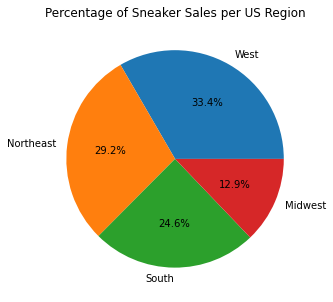

In [16]:
# create normalized pie charts for US region

# formats proportions into percentages
def func(pct, allvals): 
    return "{:.1f}%".format(pct)

fig, ax = plt.subplots()
Z = pd.value_counts(df['US_Region'], normalize = True)
ax.pie(Z.values, labels = Z.index, autopct = lambda pct: func(pct, Z.values))
plt.title('Percentage of Sneaker Sales per US Region')
plt.savefig('figures/SalesPerRegionPie.png', dpi = 300, bbox_inches = 'tight')
fig.show()

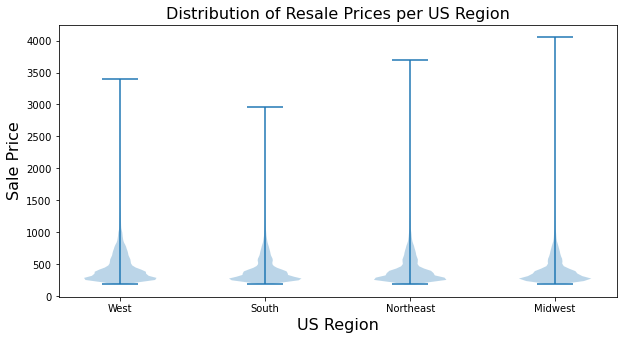

In [18]:
# Distribution of Sale Price based on US Region
cat = df['US_Region'].unique()
dataset = [df[df['US_Region'] == cat[0]]['Sale Price'].values, \
          df[df['US_Region'] == cat[1]]['Sale Price'].values, \
          df[df['US_Region'] == cat[2]]['Sale Price'].values, \
          df[df['US_Region'] == cat[3]]['Sale Price'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1, 2, 3, 4], [cat[0], cat[1], cat[2], cat[3]])
plt.title('Distribution of Resale Prices per US Region', fontsize = 16)
plt.xlabel('US Region', fontsize = 16)
plt.ylabel('Sale Price', fontsize = 16)
plt.savefig('figures/SalePricePerRegionViolin.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# proportion of sales per brand based on US Region
count_matrix = df.groupby(['US_Region', 'Brand']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis = 0)
print(count_matrix_norm)

Brand         Yeezy  Off-White
US_Region                     
Midwest    0.753210   0.246790
Northeast  0.737376   0.262624
South      0.729658   0.270342
West       0.690700   0.309300


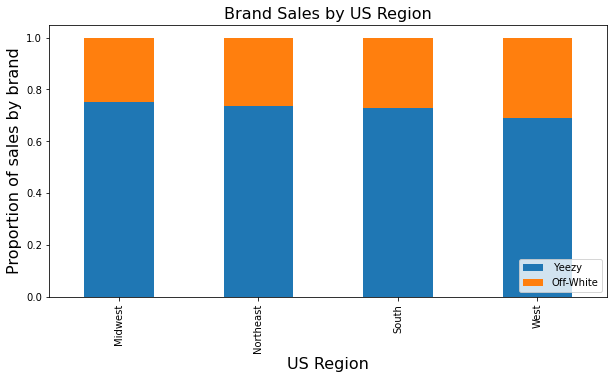

In [20]:
count_matrix_norm.plot(kind = 'bar', stacked = True)
plt.ylabel('Proportion of sales by brand', fontsize = 16)
plt.xlabel('US Region', fontsize = 16)
plt.title('Brand Sales by US Region', fontsize = 16)
plt.legend(loc = 4)
plt.savefig('figures/BrandSalesPerRegion.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# trend between US buyer region and average sale price
reg = df[['US_Region', 'Sale Price']]
un_reg = df['US_Region'].value_counts().index.tolist()
avg = []

for region in un_reg:
    row = reg.loc[reg['US_Region'] == str(region)]
    avg.append(row['Sale Price'].mean())

regions = pd.Series(un_reg)
averages = pd.Series(avg)
avgprice_df = pd.DataFrame(columns = ['US_Region', 'Average Price'])
avgprice_df['US_Region'] = regions
avgprice_df['Average Price'] = averages

avgprice_df.head()

,US_Region,Average Price
0,West,470.753478
1,Northeast,438.325666
2,South,434.590114
3,Midwest,425.927621


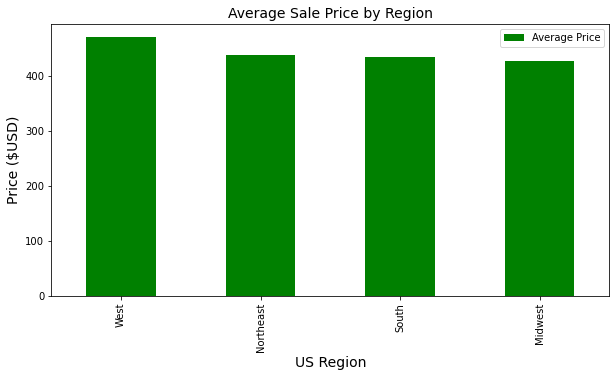

In [22]:
avgprice_df.plot(kind = 'bar', x = 'US_Region', color = 'green')
plt.title('Average Sale Price by Region', fontsize = 14)
plt.xlabel('US Region', fontsize = 14)
plt.ylabel('Price ($USD)', fontsize = 14)
plt.savefig('figures/AveragePricePerRegion.png', dpi=300, bbox_inches='tight')
plt.show()

## Preprocessing

We are going to split the data using a basic `train_test_split()`, followed by a shuffled `KFold` split. 60% of the data will belong to the training set, 20% to the validation set, and 20% to the test set. 

**Notes:**
- Our dataset is IID
- Doesn't have group structure. Each sale is its own distinct entity.
- Not time series. Even though each sale has a specific date, the date doesn't have an impact on the data during data collection. Every sale is time-independent. 
- continuous features will be preprocessed with StandardScaler
- categorical features will be processed with OneHotEncoder
- target feature (US_Region/Buyer_Region) will be preprocessed with a LabelEncoder

We'll be applying our ML models on two different target variables, `Buyer_Region`, which was a part of the original dataset, and `US_Region`, which I created on my own to reduce the number of labels in our target variable. 

In [39]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

In [36]:
# separate feature matrix and target variable 
y1 = df['US_Region']
y2 = df['Buyer_Region']
X = df.drop(columns=['Buyer_Region', 'US_Region'])
X.head()

,Order_Date,Brand,Sneaker_Name,Sale_Price,Retail_Price,Release_Date,Shoe_Size
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0


Since there are few release dates, `Release_Date` will be treated as a categorical variable. On the other hand, since there are many unique order dates (over 500), `Order_Date` will be treated as a continuous variable. 

In [37]:
# since there are few release dates, Release_Date will be treated
# as a categorical variable

# since there are many order dates (over 500), Order_Date will be treated
# as a continuous variable

# first we need to convert Order_Date into an ordinal
X.loc[:, 'Order_Date'] = X['Order_Date'].apply(lambda x: x.toordinal())
X['Order_Date']

0        736573
1        736573
2        736573
3        736573
4        736573
          ...  
99951    737103
99952    737103
99953    737103
99954    737103
99955    737103
Name: Order_Date, Length: 99956, dtype: int64

In [40]:
# prepare preprocessors 

onehot_ftrs = ['Brand', 'Sneaker_Name', 'Release_Date', 'Buyer_Region']
std_ftrs = ['Retail_Price', 'Sale_Price']
minmax_ftrs = ['Shoe_Size', 'Order_Date']

# collect all encoders
preprocessor = ColumnTransformer(
    transformers = [
        ('onehot', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), \
         onehot_ftrs), 
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ])

clf = Pipeline(steps = [('preprocessor', preprocessor)])

In [41]:
# split using train_test_split and KFold to account for randomness

# separate the test set
random_state = 42
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size = 0.2, \
                                                   random_state = random_state)
print(X_other.shape, y_other.shape)
print('test set: ', X_test.shape, y_test.shape)

# shuffled KFold split on other
kf = KFold(n_splits = 5, shuffle = True, random_state = random_state)
for train_idx, val_idx in kf.split(X_other, y_other):
    X_train = X_other.iloc[train_idx]
    y_train = y_other.iloc[train_idx]
    X_val = X_other.iloc[val_idx]
    y_val = y_other.iloc[val_idx]
    X_test = X_test
    y_test = y_test
    
    # preprocess the features 
    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    # print to ensure reproducibility
    print('training set: ', X_train.shape)
    print('preprocessed training set: ', X_train_prep.shape)
    
    # target variable preprocessed separately 
    le = LabelEncoder()
    y_train_prep = le.fit_transform(y_train)
    y_val_prep = le.transform(y_val)
    y_test_prep = le.transform(y_test)  
    
    print('X test: ', X_test_prep.shape)
    print('Y test: ', y_test_prep.shape)
# we went from 8 features to 142 features

NameError: name 'y' is not defined

## Note
Integrate all steps of the ML pipeline into separate functions. 
Next, choose an evaluation metric and implement GridSearchCV.